In [1]:
import numpy as np
import matplotlib.pyplot as plt
from procesadoDatosDemandaString import procesar_datos_string 
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score

In [2]:
datos = procesar_datos_string()
datos
labels = list(datos.index)

Archivo donde están los datos de la demanda (sin extensión): demanda


In [3]:
datos = datos.to_numpy()

In [4]:
datos = normalize(datos)

In [5]:
len(datos[0])

24

In [15]:
score_list = []
maximo = (0,0)
for x in range(2,20):
    clusterer = KMeans(n_clusters=x, random_state=1)
    cluster_labels = clusterer.fit_predict(datos)
    score = silhouette_score(datos, cluster_labels)
    score_list.append(score)
    if score > maximo[1]:
        maximo = (x, score)

<BarContainer object of 18 artists>

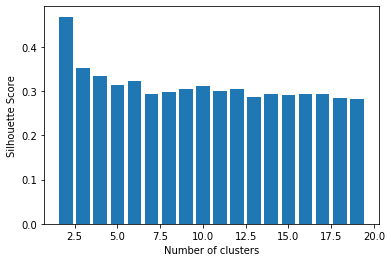

In [22]:
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.bar([x for x in range(2, 20, 1)], score_list)
print("El maximo se obtiene en el nodo {} con una puntuacion de {}".format(maximo[0], maximo[1]))

In [13]:

# y_pred te da a que cluster pertenece cada dia
# y_pred = KMeans(n_clusters=6, random_state=1).fit_predict(datos)

#dia_cluster = {}
#for i in range(len(labels)):
#    dia_cluster[labels[i]] = y_pred[i]

#plt.figure(figsize=(100, 100))
#plt.scatter(dia_cluster.keys(), dia_cluster.values(), c=y_pred)

#dias_invierno = {}
#for i in dia_cluster:
#    if i[:6] in ["201712", "201801", "201802", "201803"]:
#        dias_invierno[i] = dia_cluster[i]

#dias_cluster_0 = []
#for i in dia_cluster:
#    if dia_cluster[i] == 0:
#        dias_cluster_0.append(i)